In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('data/sales_fact.csv')

In [3]:
dates = pd.read_csv('data/date_dim.csv')

In [4]:
dates.columns

Index(['date_id', 'date', 'day_of_week', 'day_of_month', 'day_of_year',
       'last_day_in_month_indicator', 'week_of_year', 'month', 'month_name',
       'quarter', 'year', 'holiday_indicator', 'weekday_indicator'],
      dtype='object')

In [5]:
# merge sales with date
sales = pd.merge(sales, dates, how='inner', on='date_id')

In [6]:
sales

,transaction_id,time,quantity,sales_amount,product_id_bk,category_sub_id_bk,promotion_id_bk,customer_id_bk,cashier_id_bk,branch_id_bk,...,day_of_month,day_of_year,last_day_in_month_indicator,week_of_year,month,month_name,quarter,year,holiday_indicator,weekday_indicator
0,1,10,1,899.99,1,1,1.0,1,1,1,...,5,5,0,1,1,Jan,1,2023,0,0
1,1,10,1,899.99,1,1,1.0,1,1,1,...,5,5,0,1,1,Jan,1,2023,0,0
2,2,14,1,764.99,2,1,1.0,2,2,2,...,7,7,0,1,1,Jan,1,2023,0,1
3,2,14,1,764.99,2,1,1.0,2,2,2,...,7,7,0,1,1,Jan,1,2023,0,1
4,3,11,2,39.98,5,5,2.0,3,3,3,...,10,10,0,2,1,Jan,1,2023,0,0
5,3,11,2,39.98,5,5,2.0,3,3,3,...,10,10,0,2,1,Jan,1,2023,0,0
6,4,16,1,59.99,7,7,2.0,4,4,4,...,15,15,0,2,1,Jan,1,2023,0,1
7,4,16,1,59.99,7,7,2.0,4,4,4,...,15,15,0,2,1,Jan,1,2023,0,1
8,5,12,1,15.99,5,5,2.0,1,1,1,...,12,43,0,6,2,Feb,1,2023,0,1
9,5,12,1,15.99,5,5,2.0,1,1,1,...,12,43,0,6,2,Feb,1,2023,0,1


(array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 20 artists>)

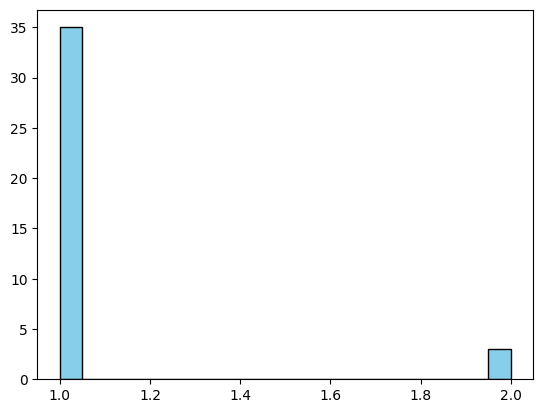

In [7]:
# Create a histogram of the Quantity column in the sales DataFrame
plt.hist(sales['quantity'], bins=20, color='skyblue', edgecolor='black')

In [8]:
sales['date'] = pd.to_datetime(sales['date'])
# aggregate sales_amount by day and order them
daily_sales = sales.groupby('date')['sales_amount'].sum().reset_index()
daily_sales = daily_sales.sort_values('date')
daily_sales

,date,sales_amount
0,2023-01-05,1799.98
1,2023-01-07,1529.98
2,2023-01-10,79.96
3,2023-01-15,119.98
4,2023-01-18,12.99
5,2023-01-20,29.99
6,2023-01-22,24.99
7,2023-01-25,19.99
8,2023-02-05,18.99
9,2023-02-08,19.98


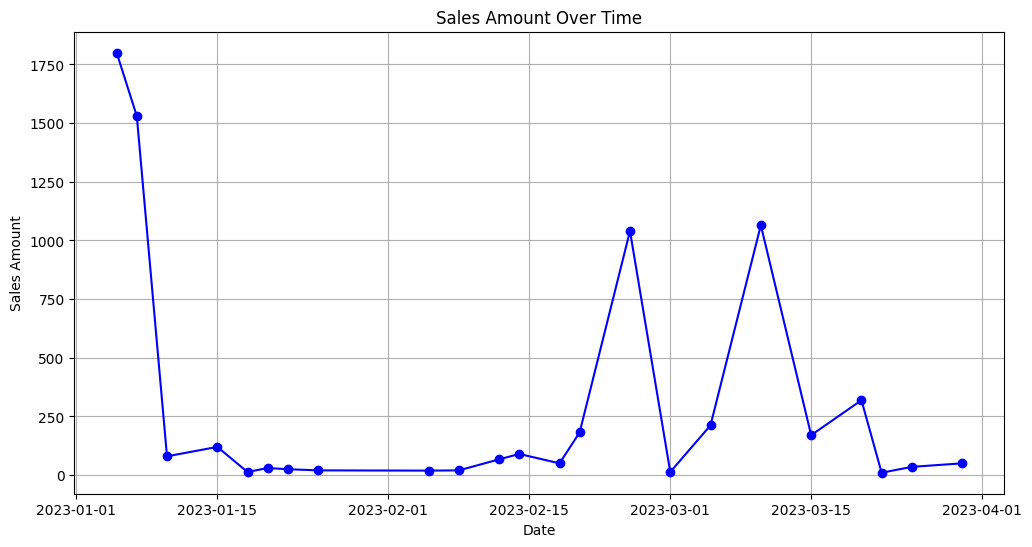

In [22]:
# Plot the daily_sales amount over time with enhancements
plt.figure(figsize=(10, 7))
plt.plot(daily_sales['date'], daily_sales['sales_amount'], marker='o', linestyle='-', color='b', markersize=6, linewidth=2)
plt.fill_between(daily_sales['date'], daily_sales['sales_amount'], color='skyblue', alpha=0.4)
plt.title('Sales Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Load the promotion_dim DataFrame
promotion_dim = pd.read_csv('data/promotion_dim.csv')

# Merge the sales DataFrame with the promotion_dim DataFrame
merged_sales = pd.merge(sales, promotion_dim, how='left', left_on='promotion_id_bk', right_on='promotion_id_bk')

# Display the merged DataFrame
merged_sales[['date', 'promotion_id_bk', 'sales_amount', 'promotion_name']]


,date,promotion_id_bk,sales_amount,promotion_name
0,2023-01-05,1.0,899.99,New Year Sale
1,2023-01-05,1.0,899.99,New Year Sale
2,2023-01-05,1.0,899.99,New Year Sale
3,2023-01-05,1.0,899.99,New Year Sale
4,2023-01-07,1.0,764.99,New Year Sale
5,2023-01-07,1.0,764.99,New Year Sale
6,2023-01-07,1.0,764.99,New Year Sale
7,2023-01-07,1.0,764.99,New Year Sale
8,2023-01-10,2.0,39.98,Valentine's Day Special
9,2023-01-10,2.0,39.98,Valentine's Day Special


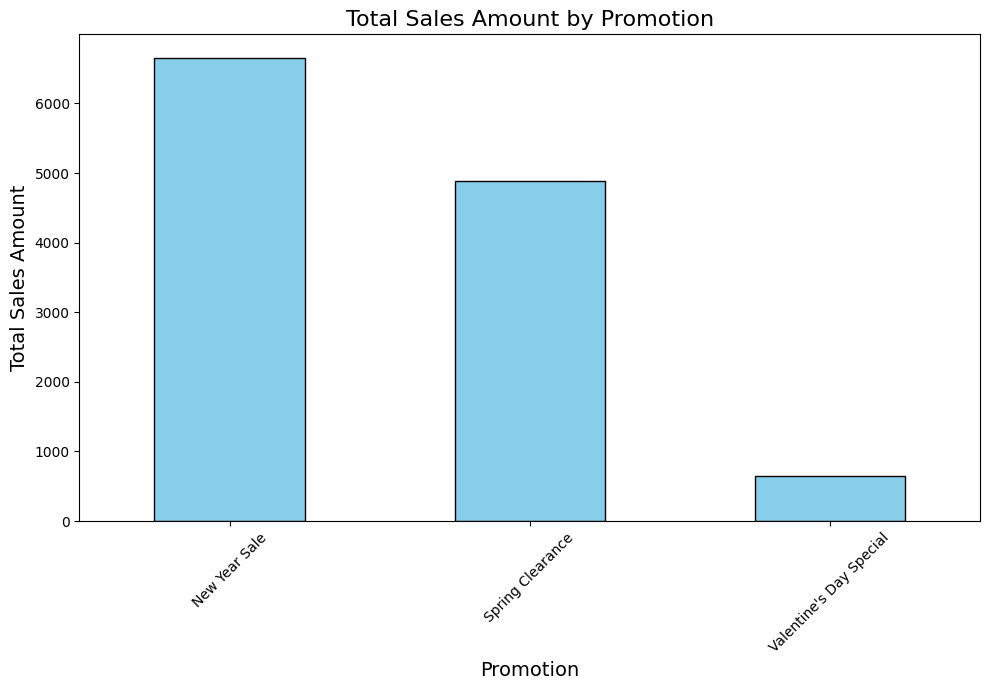

In [15]:
merged_sales[['date', 'promotion_id_bk', 'sales_amount', 'promotion_name']]
# Create a bar chart for sales amount by promotion
plt.figure(figsize=(10, 7))
merged_sales.groupby('promotion_name')['sales_amount'].sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales Amount by Promotion', fontsize=16)
plt.xlabel('Promotion', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

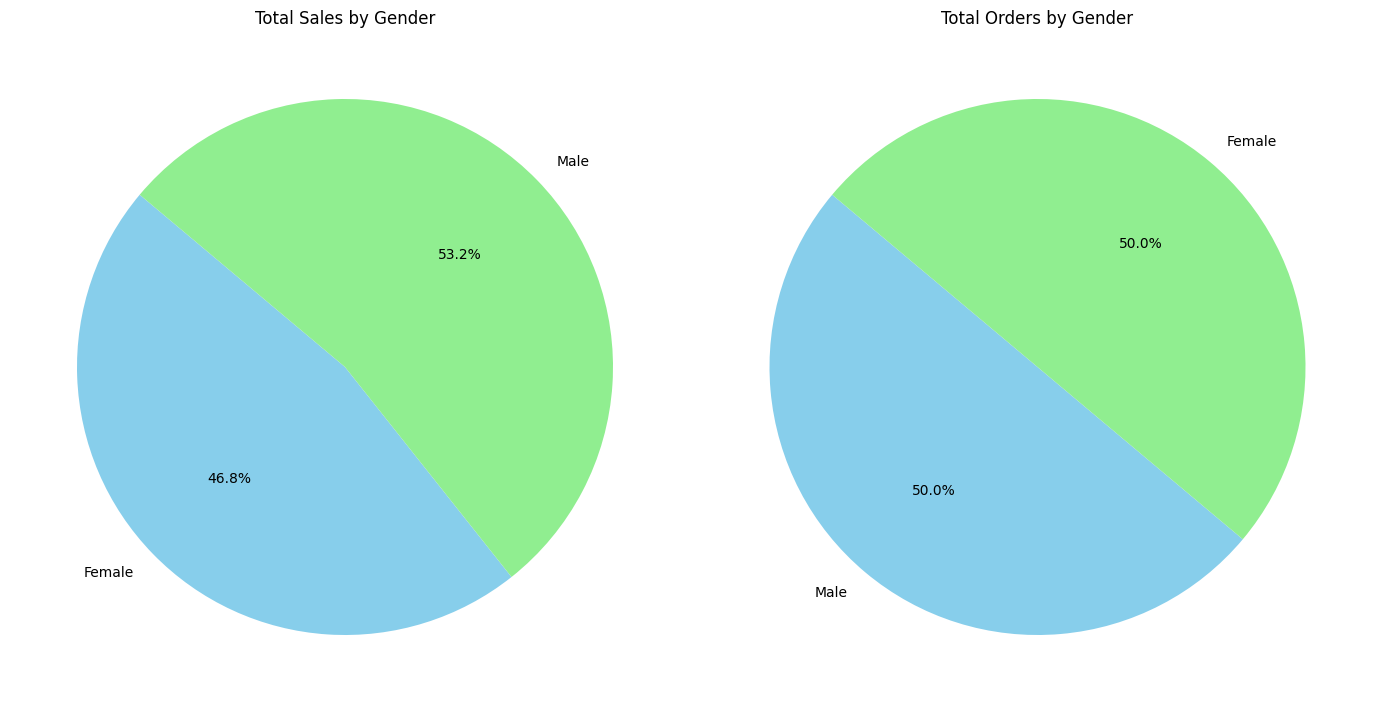

In [16]:
# Load the customer_dim DataFrame
customer_dim = pd.read_csv('data/customer_dim.csv')

# Merge the sales DataFrame with the customer_dim DataFrame to include gender information
sales_with_gender = pd.merge(sales, customer_dim[['customer_id_bk', 'gender']], how='left', left_on='customer_id_bk', right_on='customer_id_bk')

# Calculate total sales and total orders by gender
gender_sales = sales_with_gender.groupby('gender')['sales_amount'].sum()
gender_orders = sales_with_gender['gender'].value_counts()

# Plot pie chart for total sales by gender
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Total Sales by Gender')

# Plot pie chart for total orders by gender
plt.subplot(1, 2, 2)
plt.pie(gender_orders, labels=gender_orders.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Total Orders by Gender')

plt.tight_layout()
plt.show()